# Description
This ipynb contains the tests for all the classifiers 
(Simploy checking that they work, not optimizing hyperparameters and stuff).
It uses the male-female database seen in labs

In [1]:
import sys
sys.path.insert(0, '../scripts_project')

from helpers import *
import classifiers

In [2]:
## load data.
height, weight, gender = load_data()

seed = 1
# build sampled x and y.
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)
tx = np.c_[np.ones((y.shape[0], 1)), x]

y = 1.0*y
y = y.ravel()

# Centroids classifier

In [3]:
#build the classifier
clf = classifiers.ClassifierCentroids()
#train the classifier
clf.train(tx, y)
#output predictions
print('Predictions: ', clf.accuracy(clf.predict(tx), y))
#output predictions in a fancy way
clf.get_params_and_results(tx, tx, y, y )

Predictions:  0.865


{'accuracy_train': 0.865,
 'accuracy_test': 0.865,
 'params': {'name': 'ClassifierCentroids'}}

# Ridge regression

In [4]:
#recast y in needed form
y = 2*y - 1

In [5]:
#build the classifier
clf = classifiers.ClassifierLinearRegression(0.7, 'L2')
#train the classifier
clf.train(y, tx)
#output predictions
print('Predictions: ', clf.accuracy(clf.predict(tx), y))
#output the weights
print('Weights', clf.w)
#output predictions in a fancy way
clf.get_params_and_results(tx, tx, y, y )

Predictions:  0.915
Weights [ 0.01993024  0.2760528  -1.0468083 ]


{'accuracy_train': 0.915,
 'accuracy_test': 0.915,
 'params': {'name': 'ClassifierLinearRegression',
  'lambda': 0.7,
  'regularizer': 'L2'}}

# Logistic Regression

In [6]:
#recast y in needed form
y = (y + 1)/2
y

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.])

In [7]:
#build the classifier
clf = classifiers.ClassifierLogisticRegression(
    lambda_ = 0, 
    regularizer = None, 
    gamma=0.01, 
    max_iterations = 1000, 
    w_sampling_distr='normal',
    min_max_iterations=300,
    threshold = 1e-5, 
    )

#train the classifier
clf.train(y, tx, verbose = True, batch_size = 10, normalize_gradient = False)
#output predictions
print('Predictions: ', clf.accuracy(clf.predict(tx), y))
#output predictions in a fancy way
clf.get_params_and_results(tx, tx, y, y )

Current iteration=0, loss=4.2892602350806825
Current iteration=100, loss=1.288065853635908
Current iteration=200, loss=1.2177424436319324
Current iteration=300, loss=1.1988054429839563
Current iteration=400, loss=1.1913621113647679
Current iteration=500, loss=1.1878399499867374
Current iteration=600, loss=1.185987916800795
Current iteration=700, loss=1.1849501757530532
Current iteration=800, loss=1.1843454836019311
Current iteration=900, loss=1.1839844596224727
Predictions:  0.92


{'accuracy_train': 0.92,
 'accuracy_test': 0.92,
 'params': {'name': 'LogisticRegression',
  'lambda_': 0,
  'regulairizer': None,
  'gamma': 0.01,
  'max_iterations': 1000,
  'threshold': 1e-05,
  'weights': array([ 0.25095308,  2.43936487, -6.96980774]),
  'normalize_gaddient': False,
  'initial_w': array([0.17079066, 0.01887189, 0.45878047]),
  'w_sampling_distr': 'normal'}}

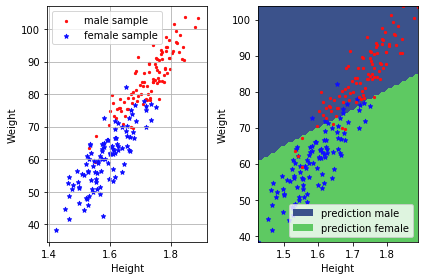

In [8]:
#Additional: visdualization tool
from plots import visualization
visualization(y, x, mean_x, std_x, clf.w.T, "classification_by_logistic_regression_gradient_descent", True)

hit thresh


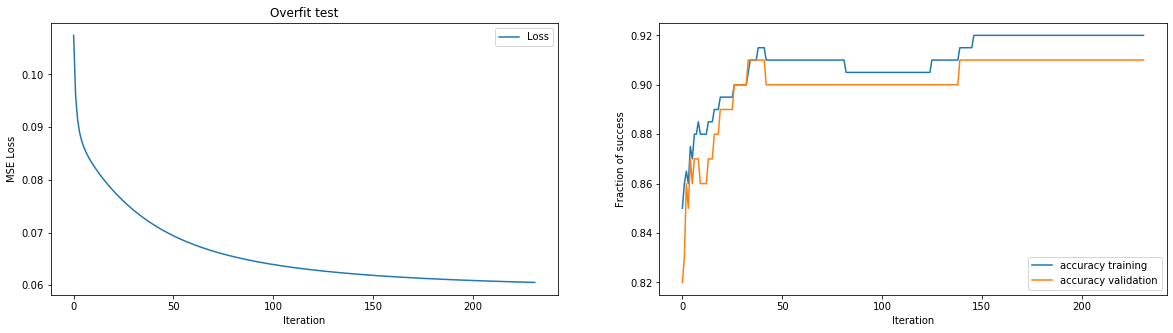

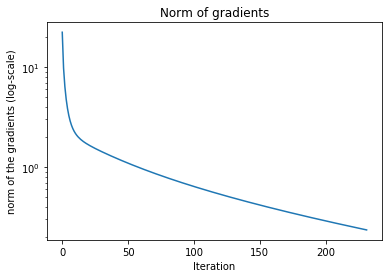

In [9]:
#Additional: training plots
from plots import training_plots

#train classifier storing relevant quantities
clf.train(y, tx, verbose = False, 
    store_gradient=True, 
    store_losses = True, 
    tx_validation=tx[:100], 
    y_validation = y[:100], 
    normalize_gradient=False)

training_plots(clf, show_gradient=True)